# Support Vector Machine (SVM)

Sumber: Udemy (Machine Learning A-Z: Hands-On Python & R In Data Science)

## Import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import dataset

In [ ]:
data = pd.read_csv("Social_Network_Ads OKE.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,33,60000,0
1,32,86000,0
2,30,79000,0
3,37,72000,0
4,23,28000,0


In [ ]:
data.shape

(280, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              280 non-null    int64
 1   EstimatedSalary  280 non-null    int64
 2   Purchased        280 non-null    int64
dtypes: int64(3)
memory usage: 6.7 KB


In [ ]:
# Ubah variabel target menjadi factor
data["Purchased"] = data["Purchased"].astype("category")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              280 non-null    int64   
 1   EstimatedSalary  280 non-null    int64   
 2   Purchased        280 non-null    category
dtypes: category(1), int64(2)
memory usage: 4.9 KB


In [ ]:
X = data[["Age", "EstimatedSalary"]]
y = data["Purchased"]

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: category
Categories (2, int64): [0, 1]

## Bagi data menjadi training set dan test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
X_train.shape

(224, 2)

In [ ]:
X_test.shape

(56, 2)

## Feature scaling -> Penyamaan skala data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[:5 ,:]

array([[-0.68541373,  1.26713955],
       [-1.15407269, -0.36790961],
       [-0.21675477,  0.15952561],
       [-0.21675477,  0.13315384],
       [ 1.2829539 ,  0.00129504]])

## Membuat model SVM menggunakan data training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Prediksi data test set

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [ ]:
banding = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
banding.head(10)

,y_test,y_pred
120,0,0
24,0,0
71,0,1
160,1,1
173,1,1
125,0,0
257,1,1
235,1,1
185,1,0
36,0,0


## Membuat confusion matrix dan nilai akurasi

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Nilai akurasi
accuracy_score(y_test, y_pred)

[[21  7]
 [ 3 25]]


0.8214285714285714

## Visualisasi hasil training set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


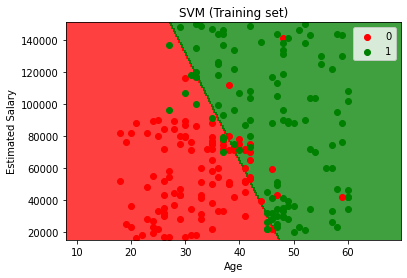

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualisasi hasil test set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


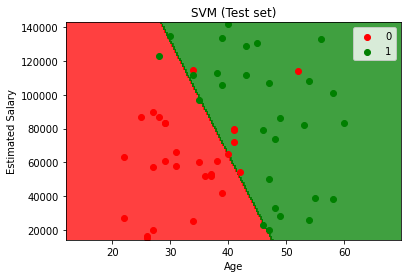

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()